# Menggunakan Library Tensorflow

In [19]:
import tensorflow as tf ##jika error,  install tensorflow terlebih dahulu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import random

seed_value = 85
tf.random.set_seed(seed_value) 
np.random.seed(seed_value)      
random.seed(seed_value)  

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist  
                                                 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

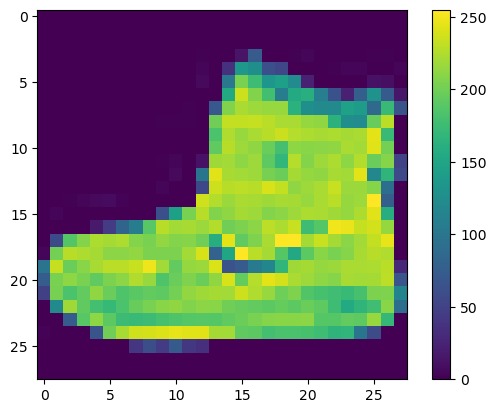

In [26]:
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False)
plt.show() 

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255


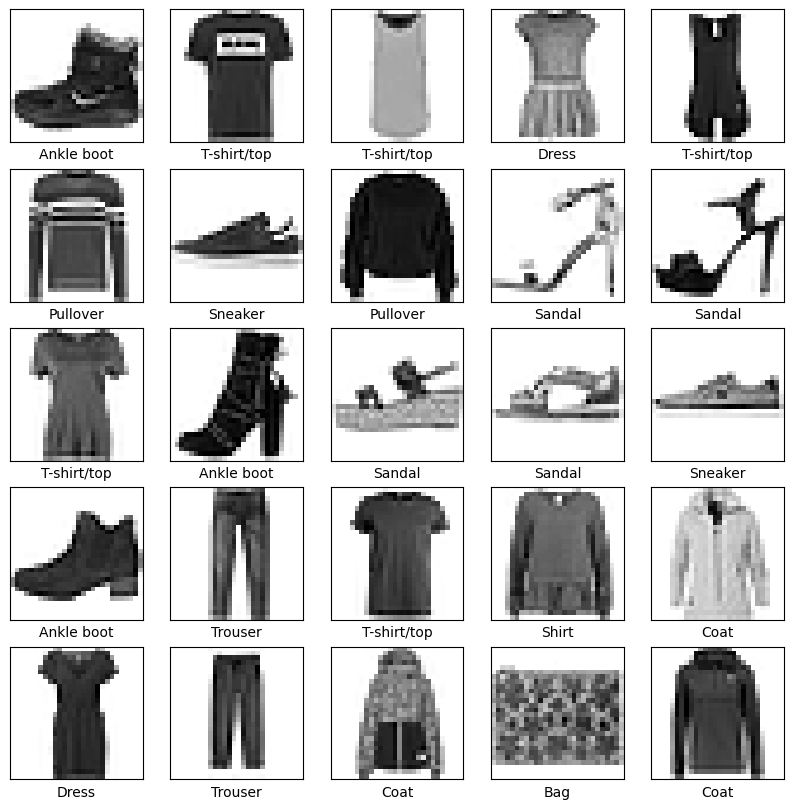

In [29]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)  
    plt.xticks([])        
    plt.yticks([])      
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)  
    plt.xlabel(class_names[train_labels[i]])         

plt.show()  

In [30]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),     
    tf.keras.layers.Flatten(),                  
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='relu'), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)                     
])

In [35]:
model_tf.compile(optimizer='adam', 
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                 metrics=['accuracy'])

In [39]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    min_delta=0.0001, 
    restore_best_weights=True  
)

history = model_tf.fit(
    train_images,  
    train_labels,  
    epochs=20, 
    validation_data=(test_images, test_labels),  
    callbacks=[early_stopping]  
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7307 - loss: 0.7465 - val_accuracy: 0.8457 - val_loss: 0.4228
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8339 - loss: 0.4566 - val_accuracy: 0.8573 - val_loss: 0.4012
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8488 - loss: 0.4176 - val_accuracy: 0.8580 - val_loss: 0.3834
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8549 - loss: 0.3934 - val_accuracy: 0.8640 - val_loss: 0.3768
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8630 - loss: 0.3785 - val_accuracy: 0.8688 - val_loss: 0.3658
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8657 - loss: 0.3645 - val_accuracy: 0.8661 - val_loss: 0.3698
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8661 - loss: 0.3623 - val_accuracy: 0.8714 - val_loss: 0.3596
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8703 - loss: 0.3508 -

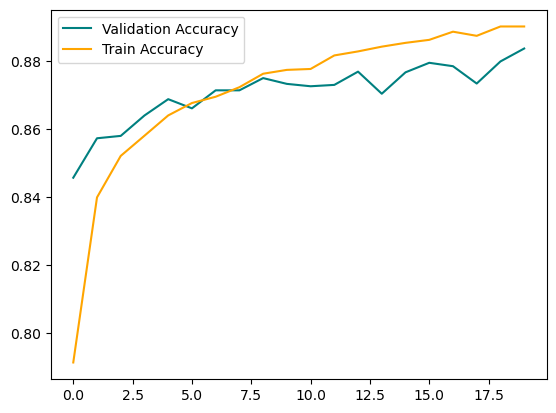

In [41]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend()
plt.show()


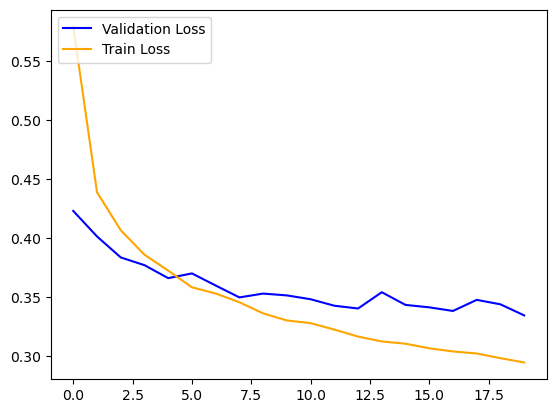

In [42]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history.history['loss'], color='orange', label='Train Loss')
plt.legend(loc = "upper left")
plt.show()


In [43]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc_tf)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8839 - loss: 0.3336

Test accuracy: 0.8837000131607056


In [44]:
probability_model = tf.keras.Sequential([model_tf, 
                                         tf.keras.layers.Softmax()])

In [45]:
predictions_tf = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [46]:
predictions_tf[0]

array([6.7200123e-10, 1.8052279e-09, 6.1025801e-10, 2.0407015e-08,
       1.1466954e-10, 7.7869277e-04, 6.8225442e-10, 1.2317632e-02,
       2.9166189e-09, 9.8690367e-01], dtype=float32)

In [47]:
np.argmax(predictions_tf[0])

9

In [49]:
test_labels[0]

9

In [50]:
def plot_image(i, predictions_array, true_label, img):  
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

def plot_value_array(i, predictions_array, true_label):  
                                                        
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

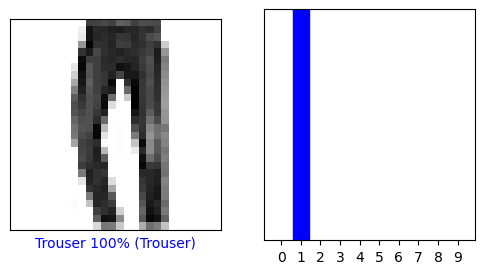

In [54]:
i = 5 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_tf[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_tf[i], test_labels)
plt.show()

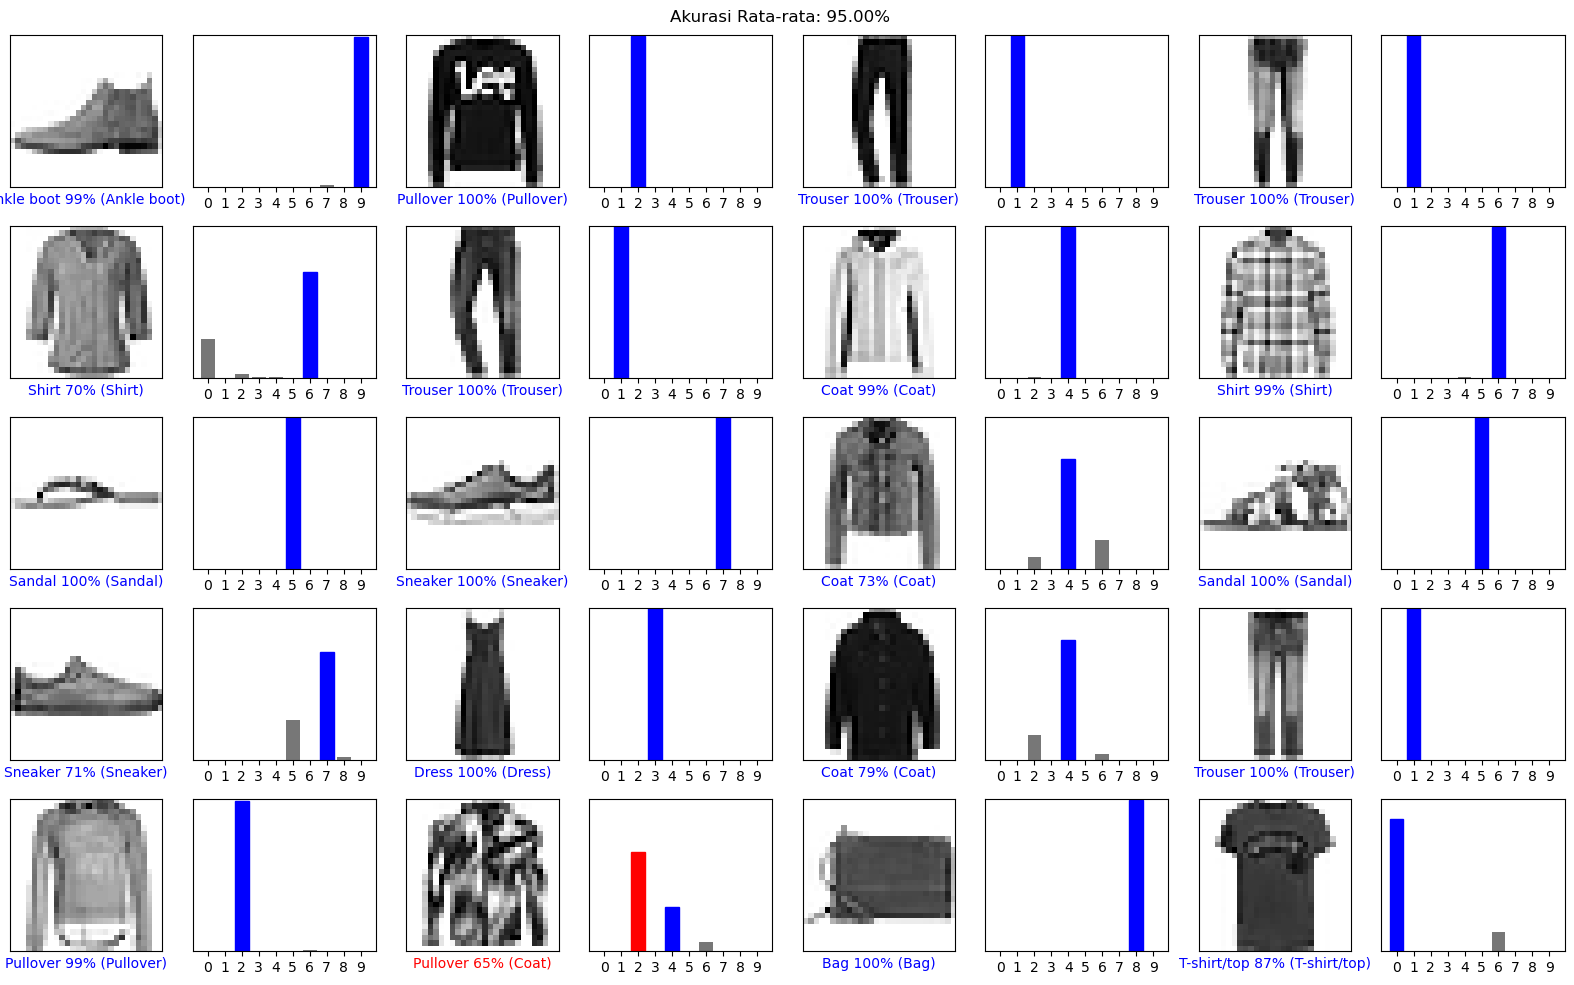

In [57]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100  

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels, test_images)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

In [58]:
img = test_images[1]

print(img.shape)

(28, 28, 1)


In [59]:
img = (np.expand_dims(img,0))

In [60]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[2.0083440e-03 6.8261792e-11 9.9582797e-01 4.1227132e-08 1.3597582e-03
  8.2851757e-15 8.0388243e-04 8.4647080e-17 4.6362411e-10 1.9783554e-16]]


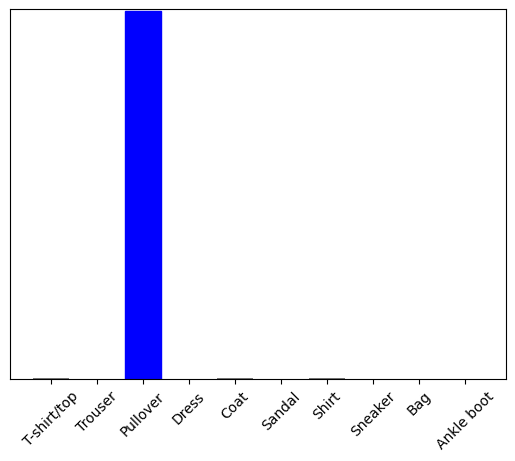

In [61]:
plot_value_array(1, predictions_single[0], test_labels)
_ =plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [62]:
np.argmax(predictions_single[0])

2

In [77]:
df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_tf, axis=1),  
    'Proba_0': predictions_tf[:, 0],  
    'Proba_1': predictions_tf[:, 1]  
})

pixels = test_images.reshape(len(test_images), -1)

df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28*28)])

df_test = pd.concat([df_test, df_pixels], axis=1)

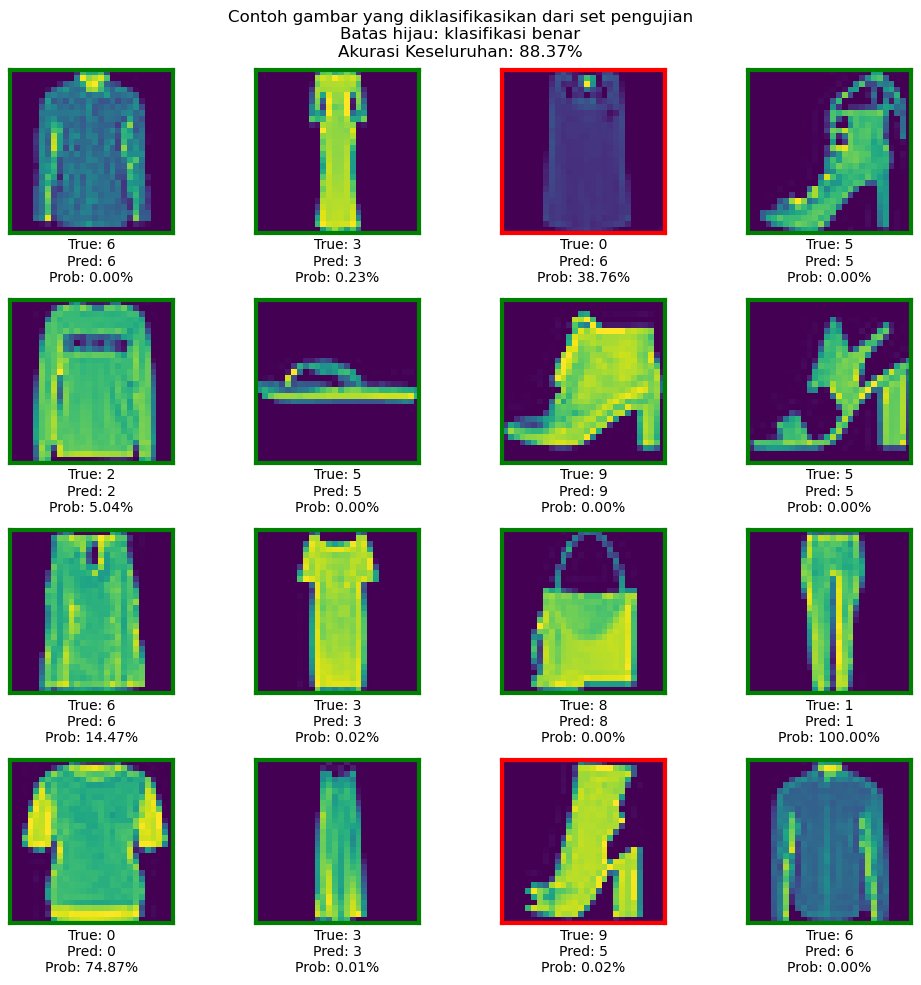

In [78]:
df_plot = df_test.sample(16, random_state=42).copy()

fig, ax = plt.subplots(4, 4, figsize=(10, 10))

rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]

    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100

    true_class = df_plot['Target'].values[i]

    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')

    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")

    edge_color = 'green' if predicted_class == true_class else 'red'
    axi.spines[:].set_edgecolor(edge_color)
    axi.spines[:].set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

# Menggunakan Library Scikit-Learn

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import tensorflow as tf

In [80]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [81]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

train_images = fashion_mnist.data[:60000] 
train_labels = fashion_mnist.target[:60000].astype(int)
test_images = fashion_mnist.data[60000:]  
test_labels = fashion_mnist.target[60000:].astype(int)

In [82]:
train_image = train_images / 255.0
test_image = test_images / 255.0

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import train_test_split
import numpy as np

train_images_split, val_images, train_labels_split, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42  # Sesuaikan dengan 2 digit NPM terakhir atau 1 digit NPM terakhir
)

model_sklearn = MLPClassifier(hidden_layer_sizes=(128, 300),
                            activation='relu', 
                            alpha=0.0001,  
                            random_state=85,  
                            learning_rate_init=0.001,  
                            early_stopping=True,  
                            validation_fraction=0.2, 
                            n_iter_no_change=10,  
                            verbose=True  
                            )


model_sklearn.fit(train_images_split, train_labels_split)
training_loss = model_sklearn.loss_curve_

Iteration 1, loss = 3.26724902
Validation score: 0.769167
Iteration 2, loss = 0.94981543
Validation score: 0.775000
Iteration 3, loss = 0.71138342
Validation score: 0.775312
Iteration 4, loss = 0.60565569
Validation score: 0.808438
Iteration 5, loss = 0.53058037
Validation score: 0.805000
Iteration 6, loss = 0.52099029
Validation score: 0.821146
Iteration 7, loss = 0.46472024
Validation score: 0.823854
Iteration 8, loss = 0.43082515
Validation score: 0.827604
Iteration 9, loss = 0.42048470
Validation score: 0.822604
Iteration 10, loss = 0.39970753
Validation score: 0.831667
Iteration 11, loss = 0.39109905
Validation score: 0.846875
Iteration 12, loss = 0.37918981
Validation score: 0.842292
Iteration 13, loss = 0.40097298
Validation score: 0.838229
Iteration 14, loss = 0.39971485
Validation score: 0.849583
Iteration 15, loss = 0.40926669
Validation score: 0.819271
Iteration 16, loss = 0.40917675
Validation score: 0.833125
Iteration 17, loss = 0.39566666
Validation score: 0.840833
Iterat

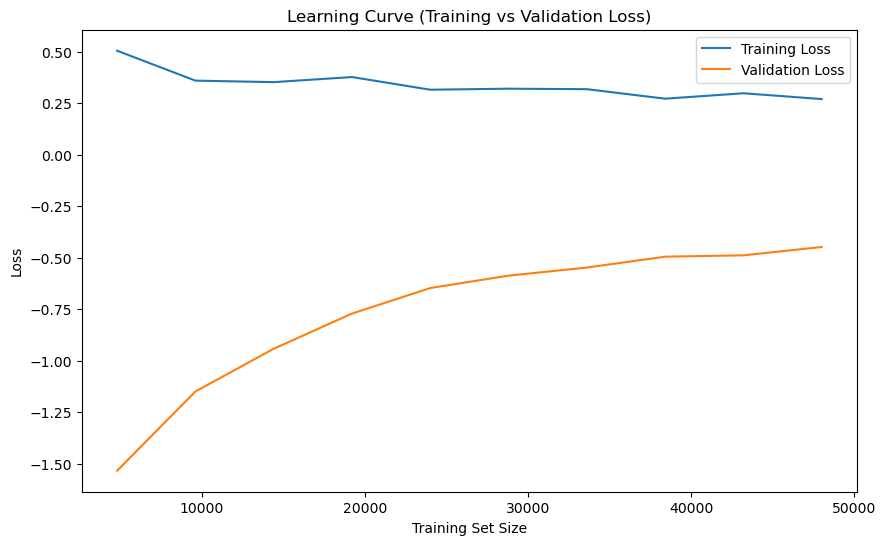

In [84]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn, train_images, train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, 
    scoring='neg_log_loss', random_state=42, n_jobs=-1)

train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_loss_mean, label='Training Loss')
plt.plot(train_sizes, val_loss_mean, label='Validation Loss')
plt.xlabel('Training Set Size')
plt.ylabel('Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.show()

In [86]:
test_predictions = model_sklearn.predict(test_images)

test_acc_sklearn = accuracy_score(test_labels, test_predictions)

print('\nTest accuracy: ', test_acc_sklearn)


Test accuracy:  0.8627


In [87]:
print("\nClassification report:\n", classification_report(test_labels, test_predictions))

predictions_proba = model_sklearn.predict_proba(test_images)


Classification report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.78      0.75      0.76      1000
           3       0.87      0.87      0.87      1000
           4       0.74      0.80      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.64      0.63      0.63      1000
           7       0.94      0.95      0.94      1000
           8       0.96      0.95      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [88]:
predictions_sklearn = model_sklearn.predict_proba(test_images)
print(predictions_sklearn[0])
print("Predicited label for first image: ", np.argmax(predictions_sklearn[0]))

print("Actual label for first image: ", test_labels.iloc[0])

[5.85248169e-14 2.79878423e-13 1.76009373e-10 2.76944872e-10
 3.42979145e-11 1.65077439e-06 9.43196219e-11 1.39420296e-03
 8.02724102e-11 9.98604146e-01]
Predicited label for first image:  9
Actual label for first image:  9


In [93]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28) 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False) 
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


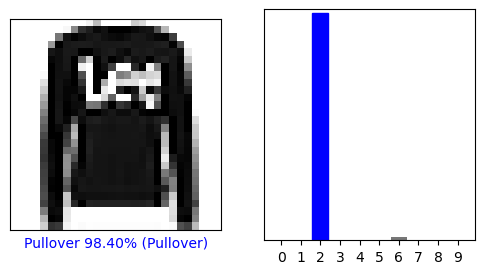

In [94]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)
plt.show()

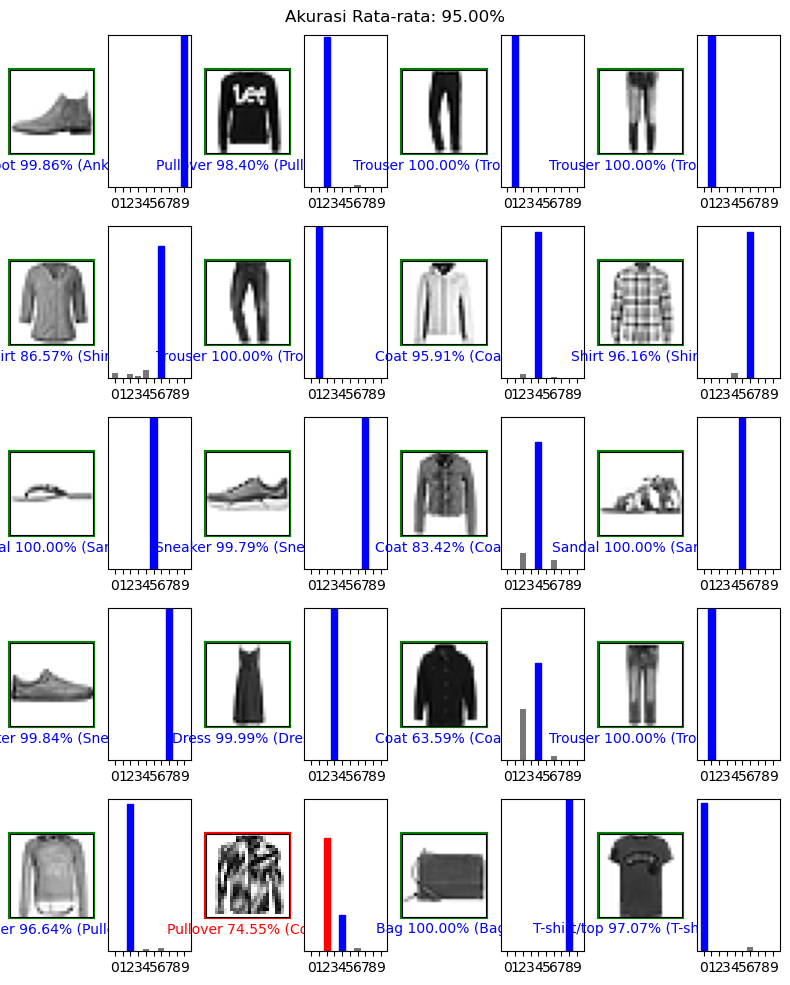

In [95]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_sklearn[i]) == test_labels.iloc[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100

plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_sklearn[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_sklearn[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

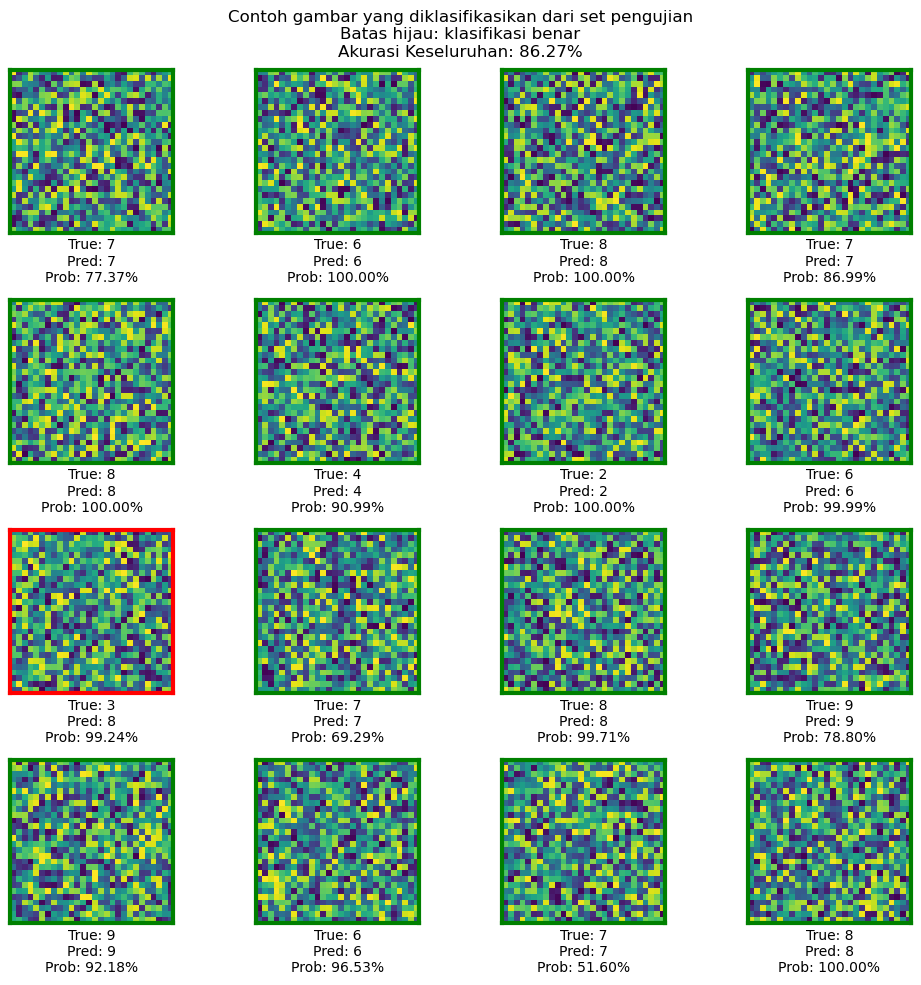

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 10000

df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_sklearn, axis=1), 
    'Proba_0': predictions_sklearn[:, 0],
    'Proba_1': predictions_sklearn[:, 1] 
})

df_test['Proba_0'] = df_test['Proba_0'] / (df_test['Proba_0'] + df_test['Proba_1'])
df_test['Proba_1'] = 1 - df_test['Proba_0']

for i in range(1, 28*28 + 1):
    df_test[f'pixel{i}'] = np.random.randint(0, 256, n_samples)

df_plot = df_test.sample(16, random_state=85).copy()  

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]
    predicted_class = df_plot['Predicted'].values[i]
    true_class = df_plot['Target'].values[i]
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 +1)]].values[i].reshape(28, 28)

    axi.imshow(pixels, cmap='viridis')
    axi.set(xticks=[], yticks=[],
           xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {max(p0, p1) * 100:.2f}%")
    edge_color = 'green' if predicted_class == true_class else 'red'
    for spine in axi.spines.values():
        spine.set_edgecolor(edge_color)
        spine.set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

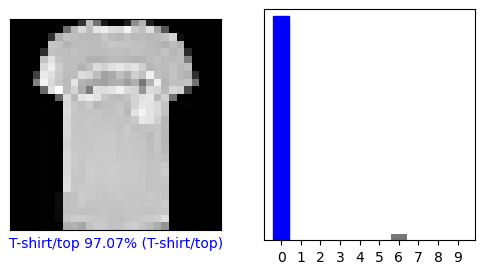

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28,28)

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.gray)  

  predicted_label = np.argmax(predictions_array)
  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label.iloc[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 19
plt.figure(figsize=(6,3))

plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)

plt.show()

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def save_image_only(i, true_label, img):
  img = img.iloc[i].values.reshape(28, 28)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.savefig(f"image_only_{i}.jpeg", bbox_inches='tight', pad_inches=0)
  plt.close()

i = 19
save_image_only(i, test_labels, test_images)

In [106]:
import pandas as pd


data = {
    'Model': ['TensorFlow', 'Scikit-Learn'],
    'Accuracy': [test_acc_tf, test_acc_sklearn],
    'Architecture': ['Neural Network (2 hidden layers)', 'MLP (2 hidden layer)'],
    'Early Stopping': ['Yes', 'Yes']
}

comparison_df = pd.DataFrame(data)
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

print("Comparison of Model Performance:")
print(comparison_df)

print("\nBest Model Based on Accuracy:")
print(best_model)

Comparison of Model Performance:
          Model  Accuracy                      Architecture Early Stopping
0    TensorFlow    0.8837  Neural Network (2 hidden layers)            Yes
1  Scikit-Learn    0.8627              MLP (2 hidden layer)            Yes

Best Model Based on Accuracy:
Model                                   TensorFlow
Accuracy                                    0.8837
Architecture      Neural Network (2 hidden layers)
Early Stopping                                 Yes
Name: 0, dtype: object


In [108]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_sklearn, file)

In [110]:
import pickle
import tensorflow as tf

model_tf.save('best_model_tf.h5')